# Predicting Force using Linear Regression (F = ma)

This project demonstrates how to apply simple linear regression to model the relationship between mass, acceleration, and force based on the physics equation F = ma.

## Tools Used
- Python
- NumPy, Pandas
- Matplotlib, Seaborn
- Scikit-learn

## Project Steps
1. Simulate data using the equation F = ma
2. Explore data and visualize relationships
3. Build a linear regression model to predict force
4. Evaluate model performance

## Result
The model accurately learns the linear relationship between mass and acceleration to predict force, with R² score close to 1.0.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# สุ่มค่า m, a
np.random.seed(42)
n = 100
m = np.random.uniform(0, 40, n)    # มวล (0-40 kg)
a = np.random.uniform(0, 5, n)    # ความเร่ง (0 ถึง 10 m/s^2)

# คำนวณ F = ma
F = m * a

# DataFrame จากการสุ่มค่า m, a และคำนวณค่าหา F
df = pd.DataFrame({
    'mass': m,
    'acceleration': a,
    'force': F
})

df.head()

,mass,acceleration,force
0,14.981605,0.157146,2.354298
1,38.028572,3.182052,121.008897
2,29.279758,1.571780,46.021335
3,23.946339,2.542853,60.892032
4,6.240746,4.537832,28.319457


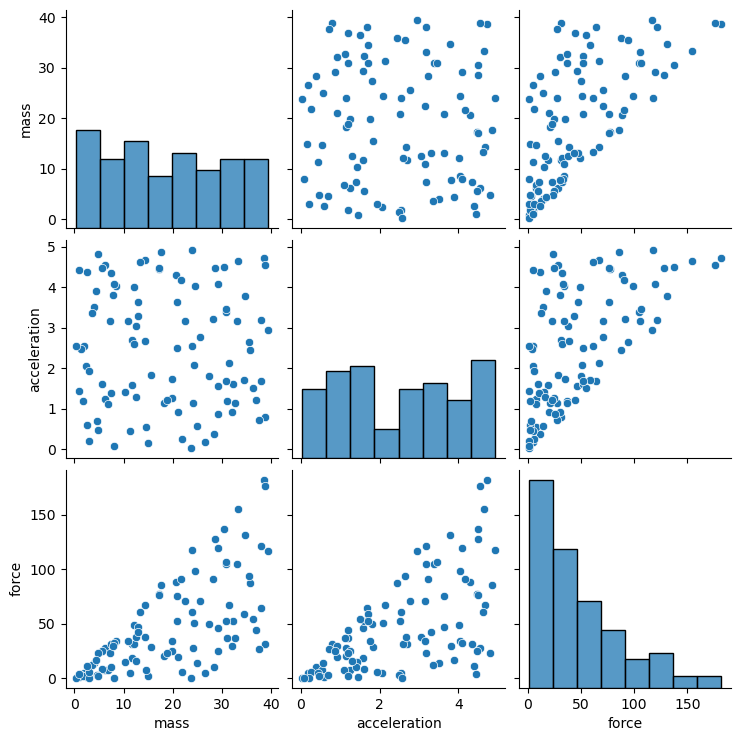

             mass  acceleration       force
count  100.000000    100.000000  100.000000
mean    18.807230      2.489159   46.226603
std     11.899576      1.465556   42.502189
min      0.220885      0.034761    0.565568
25%      7.728030      1.210023   11.709956
50%     18.565698      2.528124   32.316590
75%     29.208125      3.830918   68.066461
max     39.475477      4.928252  182.100763


In [8]:
import seaborn as sns

sns.pairplot(df)
plt.show()

print(df.describe())

In [9]:
# Features = mass, acceleration
X = df[['mass', 'acceleration']]
y = df['force']  # Target variable

# สร้างโมเดล Linear Regression
model = LinearRegression()
model.fit(X, y)

# ดูค่าพารามิเตอร์ของโมเดล
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 2.47765454 18.25911302]
Intercept: -45.82104336567449


Mean Squared Error (MSE): 272.05428276458554
R-squared (R²) Score: 0.8478759846396229


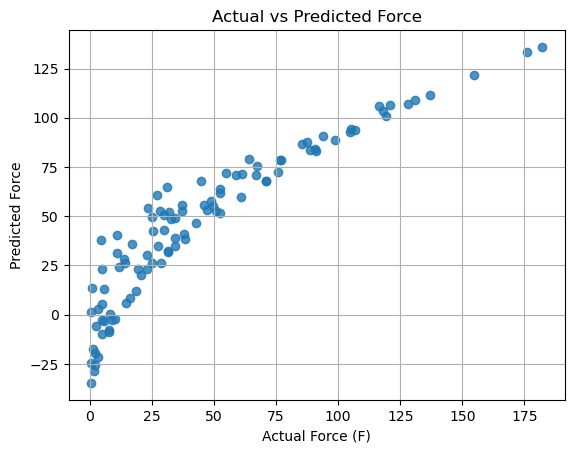

In [10]:
# พยากรณ์ค่า F ที่โมเดลทำนายได้
y_pred = model.predict(X)

# ค่าความผิดพลาดของโมเดล
print("Mean Squared Error (MSE):", mean_squared_error(y, y_pred))
print("R-squared (R²) Score:", r2_score(y, y_pred))

# กราฟเปรียบเทียบค่าแรงจริงและแรงที่โมเดลทำนายได้
plt.scatter(y, y_pred, alpha=0.8)
plt.xlabel("Actual Force (F)")
plt.ylabel("Predicted Force")
plt.title("Actual vs Predicted Force")
plt.grid(True)
plt.show()